# Вариант 9

Рассматривается система линейных гиперболических уравнений:

\begin{gather*}
    \frac { \partial \mathbf { u } } { \partial t } + \mathbf { A } \frac { \partial \mathbf { u } } { \partial x } = \mathbf { b } ( x ) , ~ 0 \leqslant x \leqslant 1, ~ 0 \leqslant t \leqslant 1, ~~ 
    \mathbf { u } ( x , 0 ) = \left( \begin{array} { c } { 2 x - x ^ { 3 } } \\ { x ^ { 3 } } \\ { x ^ { 2 } + 1 } \end{array} \right) \\
    \mathbf { A } = \left( \begin{array} { c c c } { - 21 / 2 } & { 27 / 2 } & { 3 / 2 } \\ { - 7 } & { 9 } & { 1 } \\ { 13 / 2 } & { - 19 / 2 } & { - 3 / 2 } \end{array} \right), ~~ 
    \mathbf { b } ( x ) = \left( \begin{array} { l } { 0 } \\ { 0 } \\ { 0 } \end{array} \right)
\end{gather*}

Привести систему к характеристическому виду, предложить корректную постановку граничных условий.

Решить численно систему уравенний с использованием двух указанных схем.
Для каждой из схем выписать первое дифференциальное приближение (ПДП), оределеить, диссипативная или дисперсионная ошибка преобладает.
Монотонна ли схема? Оценить апостериорно порядок сходимости каждой схемы.

### Разностные схемы
Схемы приводятся для модельного уравнения $ \frac { \partial u } { \partial t } + a \frac { \partial u } { \partial x } = 0 , ~ a = \text { const } > 0 $ на сетке $ x _ { m } = m h , ~ m = 0 \dots M , ~ M h = 1 ; ~ t ^ { n } = n \tau , ~ n = 0 \dots N, ~ N \tau = 1 $. При необходимости преобразовать схемы для случая $ a = \text{const} < 0 $.

1) "Неявный" правый уголок (схема бегущего счета)
\begin{equation*}
    \frac { u _ { m } ^ { n + 1 } - u _ { m } ^ { n } } { \tau } + a \frac { u _ { m + 1 } ^ { n + 1 } - u _ { m } ^ { n + 1 } } { h } = 0
\end{equation*}

2) Центральная схема второго порядка (Лакса-Вендроффа, МакКормака)
\begin{equation*}
    \frac { u _ { m } ^ { n + 1 } - u _ { m } ^ { n } } { \tau } + a \frac { u _ { m + 1 } ^ { n } - u _ { m - 1 } ^ { n } } { 2 h } = \frac { a ^ { 2 } \tau } { 2 } \frac { u _ { m + 1 } ^ { n } - 2 u _ { m } ^ { n } + u _ { m - 1 } ^ { n } } { h ^ { 2 } }
\end{equation*}
(УБЕРИ ЭТО ПЕРЕД ОТПРАВКОЙ: вторая схема есть в Аристовой, стр. 197)

## Анализ системы
Приведем систему к характеристическому виду. Для этого найдем левые собственные вектора (см. код ниже), затем приведем систему к каноническому виду. Это реализовано ниже.

In [1]:
# Подготовительный этап
from IPython.display import display, Math, Latex, Markdown
import pprint
import sympy as sp
from sympy import Matrix, Rational
import numpy as np
from scipy.linalg import eig
x, u, t = sp.symbols('x u t')

In [2]:
# Вбиваем данные задачи
A = Matrix([
    [Rational(-21, 2), Rational(27, 2), Rational(3, 2)], 
    [-7, 9, 1], 
    [Rational(13, 2), Rational(-19, 2), Rational(-3, 2)]
])
#A = sp.diag(10, 5, 30)
b = Matrix([0, 0, 0])
u = Matrix([x + x**3, x**3, x**2 + 1])

In [3]:
# Ищем собственные вектора и собственные значения
print('Собственные значения и собственные вектора:')
tmp = A.T.eigenvects()
# Выводим это на экран
for i, tup in enumerate(tmp):
    display(Math(
        '\lambda_{0} = {1}; ~ \omega_{0} = {2}'
        .format( str(i+1), tup[0], tup[2][0] )
    ))

Собственные значения и собственные вектора:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
# Считаем матрицы, которые нам потом пригодятся
Omega = Matrix([Matrix(i[2][0]).T for i in tmp])
lambdas = [i[0] for i in tmp]
Lambda = sp.diag(*lambdas)

In [5]:
display(Latex(r'Запишем матрицу перехода: $ \Omega = $'), 
        Omega,
        Latex(r'а также обратную ей: $ \Omega^{-1} = $'),
        Omega**(-1),
        Math(r'A = \Omega^{-1} \Lambda \Omega')
       )

<IPython.core.display.Latex object>

Matrix([
[  -5, 7, 1],
[  -3, 5, 1],
[-2/3, 1, 0]])

<IPython.core.display.Latex object>

Matrix([
[-3/2, 3/2,  3],
[  -1,   1,  3],
[ 1/2, 1/2, -6]])

<IPython.core.display.Math object>

In [6]:
display(Math(r'\mathbf{I} (x, 0) = '), Omega*u, 
       Math(r'\Lambda = '), Lambda,)

<IPython.core.display.Math object>

Matrix([
[2*x**3 + x**2 - 5*x + 1],
[2*x**3 + x**2 - 3*x + 1],
[         x**3/3 - 2*x/3]])

<IPython.core.display.Math object>

Matrix([
[-2,  0, 0],
[ 0, -1, 0],
[ 0,  0, 0]])

#### О постановке граничных условий:
В нашей системе есть 0 положительных собственных значений, 1 нулевое и 2 
отрицательных. Значит, на левой границе не нужно ставить граничных условий, на правой же границе нужно 2. В нулевом значении достаточно задать только начальное условие.

In [7]:
display(
    Markdown('Итак, мы получили {} уравнения:'.format(Lambda.shape[0])),
    *[
        Math( 
            (r'\cfrac{{\partial I_{i} }} {{\partial t}} {sign}{koeff}\cdot'+ 
             r'\cfrac{{\partial I_{i} }} {{\partial x}} = {left_part}' +
             ', ~ I_{i} (x, 0) =' 
            ).format(
                i=(k+1), 
                sign='+' if lambdas[k] >= 0 else '-',
                koeff=abs(lambdas[k]),
                size=Lambda.shape[0],
                left_part=b[k]
            )
            + sp.latex( (Omega*u)[k] )
        ) for k in range(Lambda.shape[0])
    ]
)

Итак, мы получили 3 уравнения:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Последнее уравнение решается просто:
\begin{equation*}
    I _ { 3 } ( x , t ) = \frac { x ^ { 3 } } { 3 } - \frac { 2 x } { 3 }
\end{equation*}

In [8]:
I = [sp.lambdify(x, (Omega*u)[i]) for i in range(Omega.shape[0])]

In [9]:
def make_grid(x_min, x_max, t_min, 
              t_max, h, tau, fictive_x=True):
    if fictive_x:
        x_grid = np.arange(x_min-h/2, x_max+h/2+h/4, h/2)
    else:
        x_grid = np.arange(x_min, x_max+h/4, h/2)
    t_grid = np.arange(t_min, t_max+tau/2, tau)
    # Матрица решений
    T = np.zeros((x_grid.shape[0], t_grid.shape[0]))
    return T, x_grid, t_grid

## Решение схемой неявного правого уголка
Данная схема преобразуется к виду:
\begin{equation*}
    u_m^{n+1} (1 - \sigma) + \sigma u_{m+1}^{n+1} = u_m^n, ~~ \sigma = \frac{a \tau}{h}
\end{equation*}
Здесь нам придется на каждой итерации решать систему из линейных уравений:
\begin{gather*}
    \mathbf{A} u^{n+1} = \mathbf{b} \\
    A = 
        \begin{bmatrix}
            1-\sigma & \sigma & 0 & \dots & 0 \\
            0 & 1-\sigma & \sigma & \dots & 0 \\
            \dots & \dots & \dots & \dots & \dots \\
            0 & \dots & 0 & 1-\sigma & \sigma
        \end{bmatrix}, ~~
    b = 
    \begin{bmatrix}
        u_{-1}^n \\ u_0^n \\ \dots \\ u_{M-1}^n
    \end{bmatrix}
\end{gather*}

In [10]:
import numpy as np
from numba import jit

## Tri Diagonal Matrix Algorithm(a.k.a Thomas algorithm) solver
## Взято отсюда: https://gist.github.com/cbellei/8ab3ab8551b8dfc8b081c518ccd9ada9
@jit
def TDMAsolver(a, b, c, d):
    '''
    TDMA solver, a b c d can be NumPy array type or Python list type.
    refer to http://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm
    and to http://www.cfd-online.com/Wiki/Tridiagonal_matrix_algorithm_-_TDMA_(Thomas_algorithm)
    '''
    nf = len(d) # number of equations
    ac, bc, cc, dc = map(np.array, (a, b, c, d)) # copy arrays
    for it in range(1, nf):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1]
        dc[it] = dc[it] - mc*dc[it-1]

    xc = bc
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    return xc

In [11]:
from numba import jit

"""
def get_A(sigma, M):
    res = np.zeros((M, M))
    # Диагонали
    for i in range(M-1):
        res[i,i] = 1-sigma
        res[i,i+1] = sigma
    # Дополним условием на экстраполяцию справа (мое ноу-хау)
    # u_{M-2} - 2u_{M-1} + u_M = 0
    res[M-1, M-3:] = [1, 2, 1]
    return res
"""

#@jit(nopython=True, parallel=True)
def ugolok_kernel(T, sigma):
    M, N = T.shape[0], T.shape[1]
    # На каждом этапе нам придется решать систему лин. уравнений
    # Во-первых, обратим матрицу только один раз: в начале
    # Во-вторых, для обращеня воспользуемся методом прогонки
    a1 = np.zeros(M)
    a2 = np.ones(M)*(1-sigma)
    a3 = np.ones(M)*sigma
    # Линейная экстраполяция
    a1[-1], a2[-1], a3[-1] = 1, -2, 1
    # Комбо с явным левым уголком
    #a1[-1], a2[-1], a3[-1] = 0, 0, 1
    
    solve_via_TDMA = lambda d: TDMAsolver(a1, a2, a3, d)
    for n in range(0, N-1):
        # Правая часть
        b = T[:,n]
        #print(b[-1])
        b[-1] = 0 
        # Решим систему и запишем результаты в следующую итерацию времени
        T[:, n+1] = solve_via_TDMA(b)
    # Выкинем фиктивные узлы в возвращаемом значении
    return T[1:-1, :]

In [12]:
def calculate_all_ugolok(I, a, h, tau, 
                    x_min=0, x_max=1, t_min=0, t_max=1):
    tmp = []
    for i in range(len(I)):
        func, a_curr = I[i], np.float64(a[i])
        # Создаем сетку
        T, x_grid, t_grid = make_grid(x_min, x_max, t_min, 
                                   t_max, h, tau, fictive_x=True)
        T[:,0] = func(x_grid)
        T = T.astype('double')
        # Высчитываем sigma
        sigma = np.double(a_curr*tau/h)
        # Вызываем калькулятор
        mm = ugolok_kernel(T, sigma)
        tmp.append(
            [mm, x_grid[1:-1], t_grid]  # Выкинем наши фиктивные узлы
        )
    return tmp

In [13]:
h, tau = 10**-3, 10**-3/4
T, x, t = [], [], []

In [14]:
tmp = calculate_all_ugolok(I, lambdas, h, tau)

for i, tup in enumerate(tmp):
    T.append(tup[0].T)
    x, t = tup[1], tup[2]
T = np.array(T)

In [15]:
omega_rev = np.array(Omega**-1).astype(np.float64)
solution = T.T.dot(omega_rev)

In [16]:
u_1 = solution[:,:,0]
u_2 = solution[:,:,1]
u_3 = solution[:,:,2]

In [17]:
u_1

array([[-2.5       , -2.49775047, -2.49550116, ...,  0.81497891,
         0.80907032,  0.8031646 ],
       [-2.49491729, -2.49266826, -2.49041946, ...,  0.80311475,
         0.79721074,  0.79131053],
       [-2.48983584, -2.48758731, -2.48533901, ...,  0.79125692,
         0.78535934,  0.77946648],
       ...,
       [ 0.34264967,  0.29349815,  0.2001968 , ..., -0.16683283,
        -0.16683283, -0.16683283],
       [ 0.33799575,  0.21008031,  0.05095895, ..., -0.16674988,
        -0.16674988, -0.16674988],
       [ 0.33333333,  0.03333333, -0.14      , ..., -0.16666667,
        -0.16666667, -0.16666667]])

In [18]:
# Строим анимацию для первого графика

import matplotlib.pyplot as plt
from matplotlib import animation
fig, ax = plt.subplots(figsize=(17,10))

line, = ax.plot(x, u_1[:,0], label='Решение')
initial, = ax.plot(x, u_1[:,0], label='Начальное условие')
#ax.set_ylim([u_1.min()-0.1, u_1.max()+0.1])
ax.set_ylim([-10, 10])
ax.title.set_text('Численное решение $u_1(t, x)$')
ax.set_xlabel("x")
ax.set_ylabel('$u_1(t, x)$')
ax.legend()
ax.grid()


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    initial.set_ydata([np.nan] * len(x))
    return line, initial,


def animate(i):
    line.set_ydata(u_1[:,i*10])  # update the data.
    initial.set_ydata(u_1[:,0])  # update the data.x
    return line, initial,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=30, blit=True, save_count=(u_1.shape[1]-1)/10)

# To save the animation, use e.g.
#
ani.save("movie_ugol_u1.mp4")
#
# or
#
#from matplotlib.animation import FFMpegWriter
#writer = FFMpegWriter(fps=200, metadata=dict(artist='Me'), bitrate=1800)
#ani.save("movie1.mp4", writer=writer)


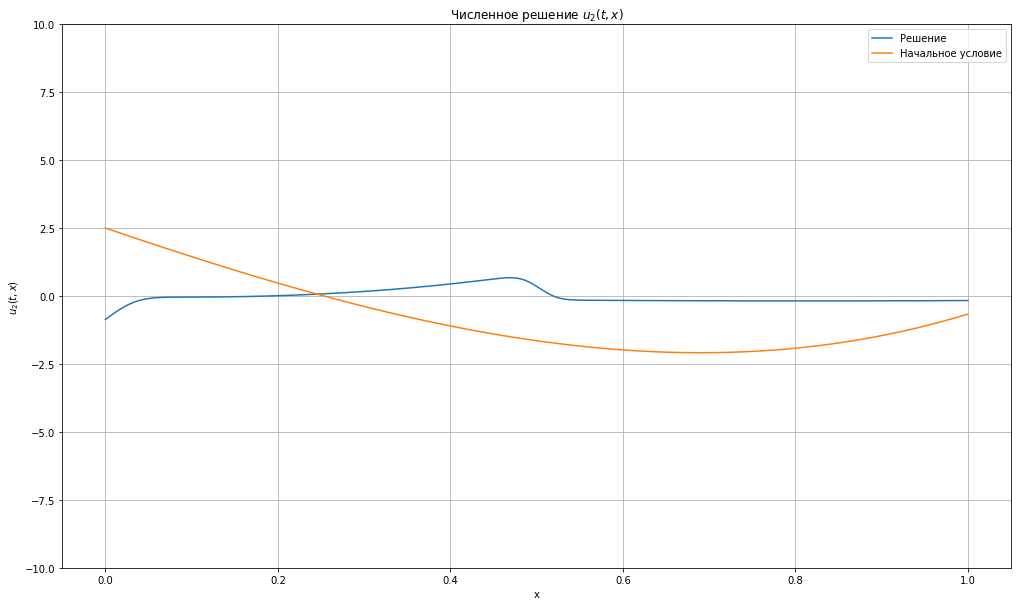

In [19]:
# Строим анимацию для второго графика

import matplotlib.pyplot as plt
from matplotlib import animation
fig, ax = plt.subplots(figsize=(17,10))

line, = ax.plot(x, u_2[:,0], label='Решение')
initial, = ax.plot(x, u_2[:,0], label='Начальное условие')
#ax.set_ylim([u_2.min()-0.1, u_2.max()+0.1])
ax.set_ylim([-10, 10])
ax.title.set_text('Численное решение $u_2(t, x)$')
ax.set_xlabel("x")
ax.set_ylabel('$u_2(t, x)$')
ax.legend()
ax.grid()


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    initial.set_ydata([np.nan] * len(x))
    return line, initial,


def animate(i):
    line.set_ydata(u_2[:,i*10])  # update the data.
    initial.set_ydata(u_2[:,0])  # update the data.
    return line, initial,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=30, blit=True, save_count=(u_2.shape[1]-1)/10)

# To save the animation, use e.g.
#
ani.save("movie_ugol_u2.mp4")
#
# or
#
#from matplotlib.animation import FFMpegWriter
#writer = FFMpegWriter(fps=200, metadata=dict(artist='Me'), bitrate=1800)
#ani.save("movie1.mp4", writer=writer)


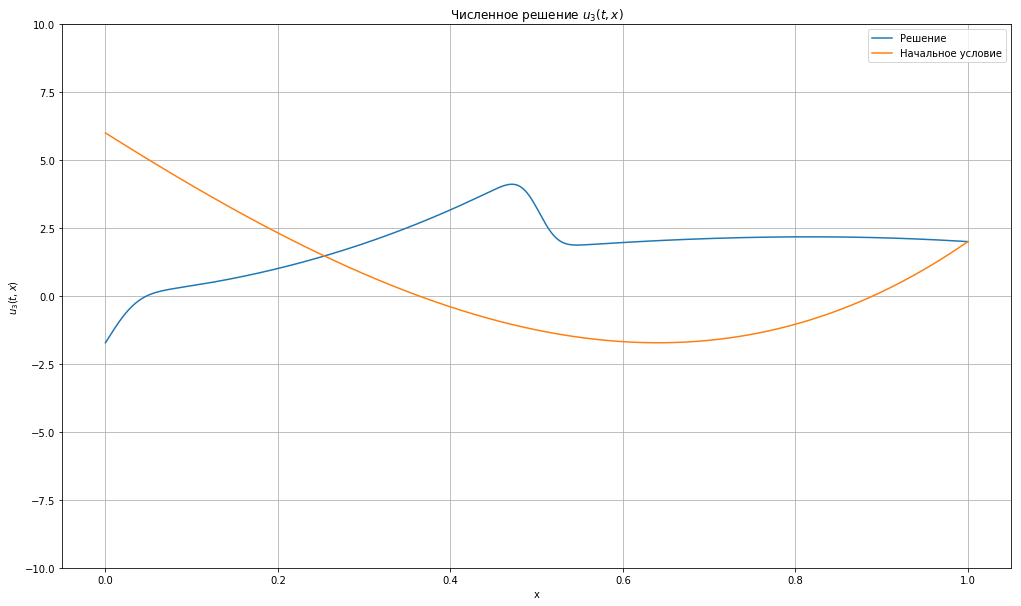

In [20]:
# Строим анимацию для третьего графика

import matplotlib.pyplot as plt
from matplotlib import animation
fig, ax = plt.subplots(figsize=(17,10))

line, = ax.plot(x, u_3[:,0], label='Решение')
initial, = ax.plot(x, u_3[:,0], label='Начальное условие')
#ax.set_ylim([u_3.min()-0.1, u_3.max()+0.1])
ax.set_ylim([-10, 10])
ax.title.set_text('Численное решение $u_3(t, x)$')
ax.set_xlabel("x")
ax.set_ylabel('$u_3(t, x)$')
ax.legend()
ax.grid()


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    initial.set_ydata([np.nan] * len(x))
    return line, initial,


def animate(i):
    line.set_ydata(u_3[:,i*10])  # update the data.
    initial.set_ydata(u_3[:,0])  # update the data.
    return line, initial,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=30, blit=True, save_count=(u_3.shape[1]-1)/10)

# To save the animation, use e.g.
#
ani.save("movie_ugol_u3.mp4")
#
# or
#
#from matplotlib.animation import FFMpegWriter
#writer = FFMpegWriter(fps=200, metadata=dict(artist='Me'), bitrate=1800)
#ani.save("movie1.mp4", writer=writer)


## Решение центральной схемой второго порядка

Данная схема преобразуется к виду:
\begin{equation*}
    u _ { n } ^ { n + 1 } = u _ { m } ^ { n } - \frac { a \tau } { 2 h } \left( u _ { m + 1 } ^ { n } - u _ { m - 1 } ^ { n } \right) + \frac { a ^ { 2 } \tau ^ { 2 } } { 2 h ^ { 2 } } \left( u _ { m + 1 } ^ { n } - 2 u _ { m } ^ { n } + u _ { m - 1 } ^ { n } \right)
\end{equation*}
Мы введем два фиктивных узла по сетке $x$ (слева и справа). На каждой итерации по $n$ (время) значения в фиктивных узлах будем пересчитывать через линейную интерполяцию по двум предыдущим точкам (поскольку $h$ мало, это должно хватить).

In [21]:
@jit(nopython=True, parallel=True)
def laks_kernel(T, sigma):
    """
    Основной калькулятор. Предполагается, что в `T` уже включены начальные данные
    """
    M, N = T.shape[0], T.shape[1]
    for n in range(0, N-1):
        for m in range(1, M-1):
            T[m, n+1] = T[m, n] - sigma/2*(T[m+1, n] - T[m-1, n]) \
            + sigma**2/2* (T[m+1, n] - 2*T[m, n] + T[m-1, n])
        # Линейная экстраполяция слева
        T[0, n+1] = 2*T[1, n+1] - T[2, n+1]
        # Линейная экстраполяция справа
        T[M-1, n+1] = 2*T[M-2, n+1] - T[M-3, n+1]
    return T[1:-1,:]

In [22]:
def calculate_all_laks(I, a, h, tau, 
                    x_min=0, x_max=1, t_min=0, t_max=1):
    tmp = []
    for i in range(len(I)):
        func, a_curr = I[i], np.float64(a[i])
        # Создаем сетку
        T, x_grid, t_grid = make_grid(x_min, x_max, t_min, 
                                   t_max, h, tau, fictive_x=True)
        T[:,0] = func(x_grid)
        T = T.astype('double')
        # Высчитываем sigma
        sigma = np.double(a_curr*tau/h)
        # Вызываем Лакаса
        mm = laks_kernel(T, sigma)
        tmp.append(
            [mm, x_grid[1:-1], t_grid]  # Выкинем наши фиктивные узлы
        )
    return tmp

In [23]:
h, tau = 10**-3, 10**-3/4
T, x, t = [], [], []

In [24]:
tmp = calculate_all_laks(I, lambdas, h, tau)

In [25]:
for i, tup in enumerate(tmp):
    T.append(tup[0].T)
    x, t = tup[1], tup[2]
T = np.array(T)

In [26]:
omega_rev = np.array(Omega**-1).astype(np.float64)
solution = T.T.dot(omega_rev)

In [27]:
u_1 = solution[:,:,0]
u_2 = solution[:,:,1]
u_3 = solution[:,:,2]

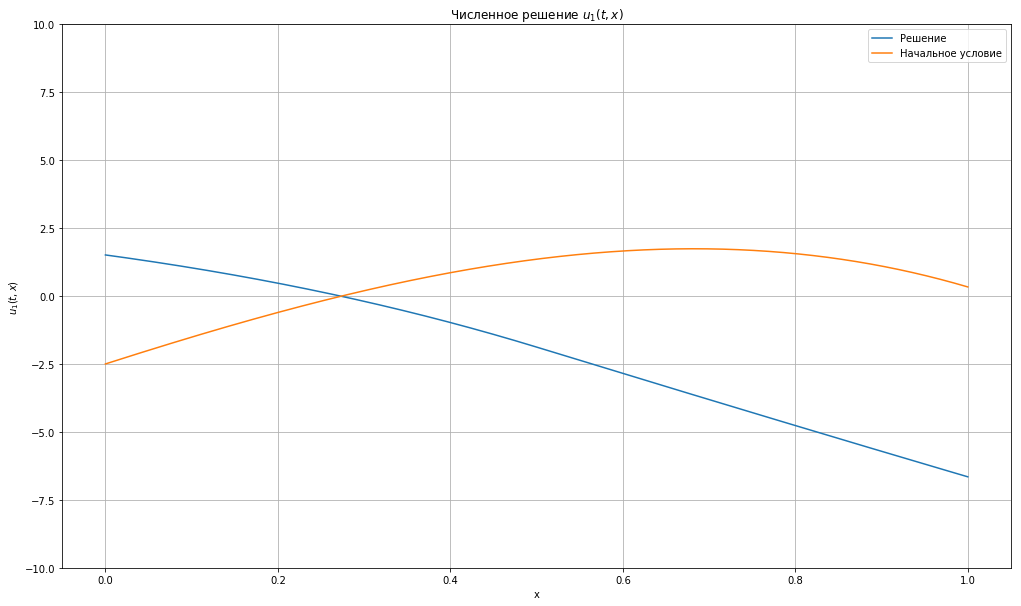

In [28]:
# Строим анимацию для первого графика

import matplotlib.pyplot as plt
from matplotlib import animation
fig, ax = plt.subplots(figsize=(17,10))

line, = ax.plot(x, u_1[:,0], label='Решение')
initial, = ax.plot(x, u_1[:,0], label='Начальное условие')
#ax.set_ylim([u_1.min()-0.1, u_1.max()+0.1])
ax.set_ylim([-10, 10])
ax.title.set_text('Численное решение $u_1(t, x)$')
ax.set_xlabel("x")
ax.set_ylabel('$u_1(t, x)$')
ax.legend()
ax.grid()


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    initial.set_ydata([np.nan] * len(x))
    return line, initial,


def animate(i):
    line.set_ydata(u_1[:,i*10])  # update the data.
    initial.set_ydata(u_1[:,0])  # update the data.x
    return line, initial,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=30, blit=True, save_count=(u_1.shape[1]-1)/10)

# To save the animation, use e.g.
#
ani.save("movie_laks_u1.mp4")
#
# or
#
#from matplotlib.animation import FFMpegWriter
#writer = FFMpegWriter(fps=200, metadata=dict(artist='Me'), bitrate=1800)
#ani.save("movie1.mp4", writer=writer)


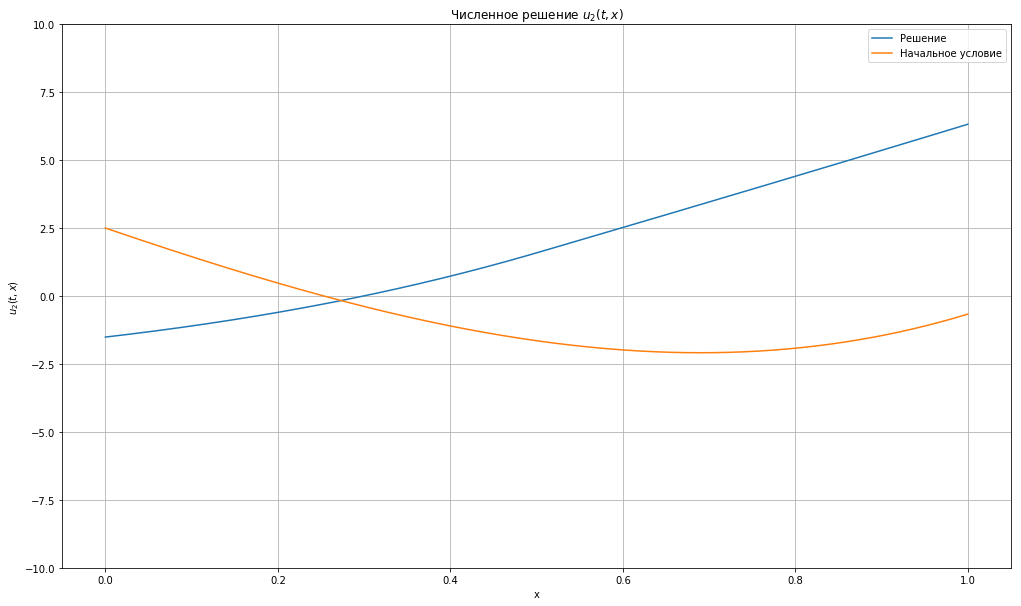

In [29]:
# Строим анимацию для второго графика

import matplotlib.pyplot as plt
from matplotlib import animation
fig, ax = plt.subplots(figsize=(17,10))

line, = ax.plot(x, u_2[:,0], label='Решение')
initial, = ax.plot(x, u_2[:,0], label='Начальное условие')
#ax.set_ylim([u_2.min()-0.1, u_2.max()+0.1])
ax.set_ylim([-10, 10])
ax.title.set_text('Численное решение $u_2(t, x)$')
ax.set_xlabel("x")
ax.set_ylabel('$u_2(t, x)$')
ax.legend()
ax.grid()


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    initial.set_ydata([np.nan] * len(x))
    return line, initial,


def animate(i):
    line.set_ydata(u_2[:,i*10])  # update the data.
    initial.set_ydata(u_2[:,0])  # update the data.
    return line, initial,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=30, blit=True, save_count=(u_2.shape[1]-1)/10)

# To save the animation, use e.g.
#
ani.save("movie_laks_u2.mp4")
#
# or
#
#from matplotlib.animation import FFMpegWriter
#writer = FFMpegWriter(fps=200, metadata=dict(artist='Me'), bitrate=1800)
#ani.save("movie1.mp4", writer=writer)


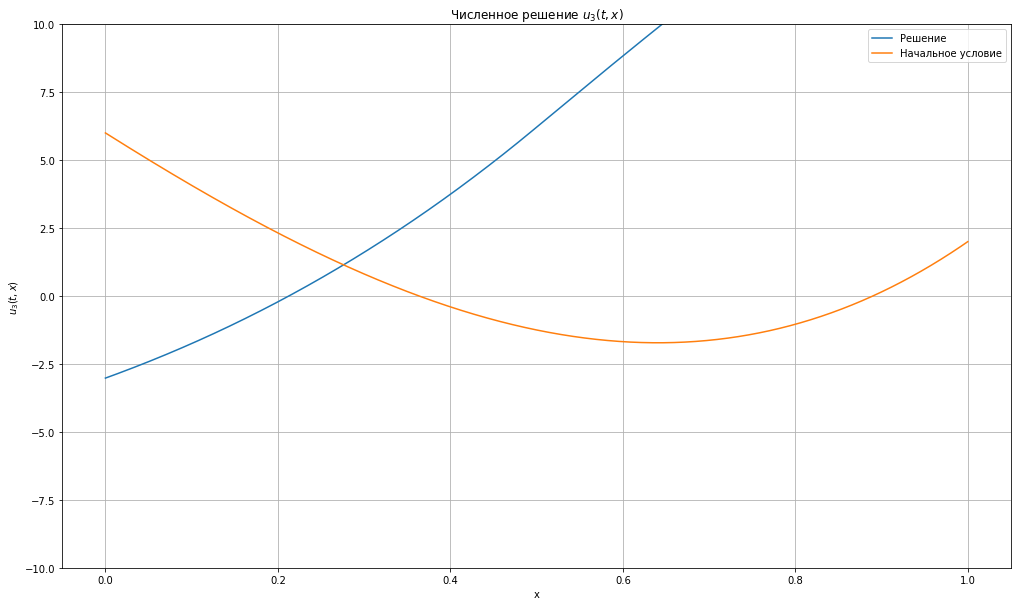

In [30]:
# Строим анимацию для третьего графика

import matplotlib.pyplot as plt
from matplotlib import animation
fig, ax = plt.subplots(figsize=(17,10))

line, = ax.plot(x, u_3[:,0], label='Решение')
initial, = ax.plot(x, u_3[:,0], label='Начальное условие')
#ax.set_ylim([u_3.min()-0.1, u_3.max()+0.1])
ax.set_ylim([-10, 10])
ax.title.set_text('Численное решение $u_3(t, x)$')
ax.set_xlabel("x")
ax.set_ylabel('$u_3(t, x)$')
ax.legend()
ax.grid()


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    initial.set_ydata([np.nan] * len(x))
    return line, initial,


def animate(i):
    line.set_ydata(u_3[:,i*10])  # update the data.
    initial.set_ydata(u_3[:,0])  # update the data.
    return line, initial,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=30, blit=True, save_count=(u_3.shape[1]-1)/10)

# To save the animation, use e.g.
#
ani.save("movie_laks_u3.mp4")
#
# or
#
#from matplotlib.animation import FFMpegWriter
#writer = FFMpegWriter(fps=200, metadata=dict(artist='Me'), bitrate=1800)
#ani.save("movie1.mp4", writer=writer)
